# Estimating the biomass of wild land mammals

In [1]:
from scipy.stats import gmean
import sys
sys.path.insert(0,'../../../statistics_helper/')
from CI_helper import *
smil_estimate = 0.025e15
shai_meiri_estimate = 5454700007879 
barnosky_estimate = 10**10.72*1000 #From figure 3
prehuman_barnosky_biomass = 10**11.165*1000*0.15 #From figure 3
best_land_mammal_biomass = gmean([smil_estimate,shai_meiri_estimate,barnosky_estimate])*0.15
land_mammal_CI = geo_CI_calc(np.array([smil_estimate,shai_meiri_estimate,barnosky_estimate]))

# Estimating the biomass of wild marine mammals

,Biomass estimate from IUCN,Biomass estimate from Christensen
Biomass estimate from IUCN,1.0000,0.9753
Biomass estimate from Christensen,0.9753,1.0000


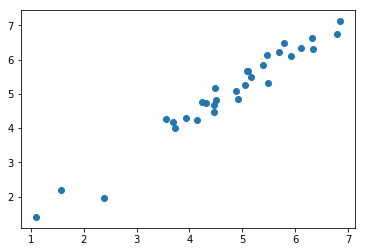

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
comparison_data = pd.read_excel('marine_mammal_data.xlsx',index_col=0)
plt.scatter(np.log10(comparison_data['Biomass estimate from Christensen']),np.log10(comparison_data['Biomass estimate from IUCN']))
#comparison_data[['Biomass estimate from Christensen','Biomass estimate from IUCN']].plot()
#comparison_data.plot.scatter(x='Biomass estimate from Christensen',y='Biomass estimate from IUCN')
christensen = pd.read_excel('marine_mammal_data.xlsx','Christensen',skiprows=1,index_col=0)
best_christensen = christensen.loc[2000,'Mean']*0.15
best_IUCN = comparison_data['Biomass estimate from IUCN'].sum()*1e6*0.15

comparison_data.corr(method='spearman')

# Estimating the total biomass of wild mammals

In [3]:
best_wild_mammals = best_christensen+best_land_mammal_biomass
marine_mammal_CI = np.max([geo_CI_calc(np.array([best_IUCN,best_christensen])),christensen.loc[2000,'Max']/christensen.loc[2000,'Mean']])
mul_CI = CI_sum_prop(np.array([best_wild_mammals,best_christensen]), np.array([land_mammal_CI,marine_mammal_CI]))
mul_CI


2.2644456862709692